In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
فروشگاه محصولات اداری
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این تمرین داده‌های مربوط به یک فروشگاه لوازم اداری به شما داده شده است.
نخست داده‌ها را از فایل 
<code>Global-Superstore.xlsx</code>
بخوانید و در متغیر <code>df</code> بریزید.
</font>
</p>

In [2]:
df = pd.read_csv("SuperStore.csv")

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حالا با استفاده از کتابخانه plt نمودار سود (profit) رادر یک نمودار هیستوگرام رسم کنید.
تعداد ستون ها را حداقل 250 تا در نظر بگیرید.
هم چنین برای مشاهده بهتر نمودار، بازه سود را محدودتر کنید.
</font>
</p>

In [3]:
df['Profit'].describe(include='all')

count    32559.000000
mean        36.648956
std        218.195871
min      -6599.978000
25%        -11.056500
50%          7.104000
75%         68.700000
max       8399.976000
Name: Profit, dtype: float64

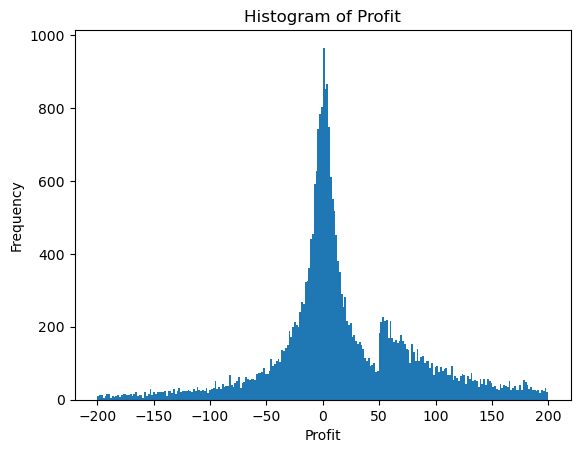

In [4]:
plt.hist(df['Profit'], bins=250, range=[-200, 200])
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Histogram of Profit')
plt.show()


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>در این سوال میخواهیم شما ۲ فرضیه را مورد ارزیابی قرار دهید و نتایج خود را برای ما شرح دهید .</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> در انتخاب مدل برای تست فرض و همچنین داده‌های لازم برای انجام تست بسیار دقت کنید .</font>
</p>



<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3> برای فرض اول لازم است که سطرهای دیتافریم را طبق ستون نوع ارسال از هم جدا کنید.. </font>
</p><p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3> برای فرض دوم هم لازم است که فروش‌های با تخفیف را از بدون تخفیف‌ها جدا کنید. </font>
</p>

In [5]:
# Question 1

# Null hypothesis (H0): There is no difference in "profit" between (First Class) and (Standard Class) shipping
# Alternative hypothesis (H1): There is a difference in "profit" between (First Class) and (Standard Class) shipping
# t-test independent

first_class = df[df['Ship Mode'] == 'First Class']
standard_class = df[df['Ship Mode'] == 'Standard Class']

first_class_profit_mean = first_class['Profit'].mean()
standard_class_profit_mean = standard_class['Profit'].mean()

print("First Class profit mean:", first_class_profit_mean)
print("Standard Class profit mean:", standard_class_profit_mean)

First Class profit mean: 34.95111632932393
Standard Class profit mean: 37.119373888065425


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>فرضیه اول</b>
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
از شما میخواهیم که بررسی کنید که آیا روش ارسال‌های متفاوت (Ship Mode) روی میزان سودی که فروشگاه به دست می‌آورد تاثیرگذار است یا خیر؛
برای این کار دو حالت ‍‍First Class و Standard Class را با هم مقایسه کنید.
</font>
</p>

In [6]:
from scipy.stats import ttest_ind

t_stat_1, p_value_1 = ttest_ind(first_class['Profit'], standard_class['Profit'])

print(f'T-statistic: {t_stat_1}')
print(f'P-value: {p_value_1}')

# p-value = 0.537 > 0.05 (5%), so Accept null hypothesis
# There is not enough evidence of difference in mean "profit" between (First Class) and (Standard Class) shipping

T-statistic: -0.616854433729616
P-value: 0.5373365032200544


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>فرضیه دوم</b>
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>از شما میخواهیم تا بررسی کنید آیا تخفیف‌دار کردن محصولات باعث افزایش تعداد کالا های خریداری شده از یک نوع (Quantity) در فروشگاه خواهد شد یا خیر</font>
</p>

In [7]:
# Question 2

# Null hypothesis (H0): "Discounting" products does not increase the (quantity) sold
# Alternative hypothesis (H1): "Discounting" products increases the (quantity) sold
# t-test independent

discounted = df[df['Discount'] > 0]
non_discounted = df[df['Discount'] == 0]

discounted_mean = discounted['Quantity'].mean()
non_discounted_mean = non_discounted['Quantity'].mean()

print("Discounted quantity mean:", discounted_mean)
print("Non-discounted quantity mean:", non_discounted_mean)

t_stat_2, p_value_2 = ttest_ind(discounted['Quantity'], non_discounted['Quantity'])

print(f'T-statistic: {t_stat_2}')
print(f'P-value: {p_value_2}')

# p-value = 1.733 < 0.05 (5%), so reject null hypothesis
# There is enough evidence that "discounting" products increases the (quantity) sold

Discounted quantity mean: 3.6091519494442252
Non-discounted quantity mean: 3.7688730115934215
T-statistic: -6.022728165644948
P-value: 1.7333697766477373e-09


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [8]:
import zlib
import zipfile

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

file_names = ["Statistics.ipynb", "SuperStore.csv"]

compress(file_names)

File Paths:
['Statistics.ipynb', 'SuperStore.csv']
